In [1]:
import pandas as pd
from sklearn import linear_model

In [14]:
us_house=pd.read_csv('https://raw.githubusercontent.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/master/USA_Housing.csv')
us_house.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Processing data

In [3]:
us_house=us_house.drop('Address',axis=1)


In [4]:
us_house=us_house.dropna(axis=0)

In [5]:
x=us_house[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y=us_house['Price']
xtest=x[4000:]  #we can also use: xtrain,xtest,ytrain,yetest=train_test_split(x,y,test_size=0.2) 
ytest=y[4000:]  # from train_test_split model
xtrain=x[:4000]
ytrain=y[:4000]
len(ytrain)

4000

## Analysis

In [6]:
regres=linear_model.LinearRegression()
regres.fit(xtrain,ytrain)
ypredicted=regres.predict(xtest)

In [7]:
regres.score(xtest,ytest) # accuracy of our model is 91%
                          # Return the coefficient of determination of the prediction.The best possible score is 1.0

0.9138111758689578

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ypredicted) # the value should be less but it is huge here

10415367207.046894

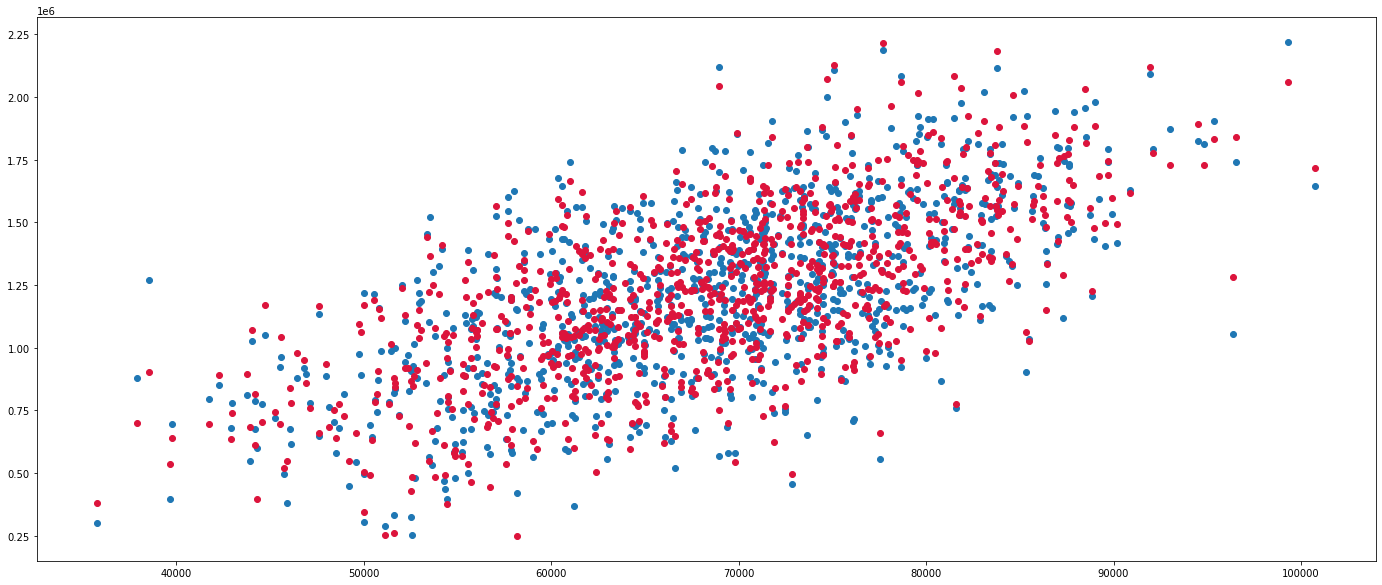

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 10))
plt.scatter(xtest['Avg. Area Income'],ytest)
plt.scatter(xtest['Avg. Area Income'],ypredicted,color='crimson')

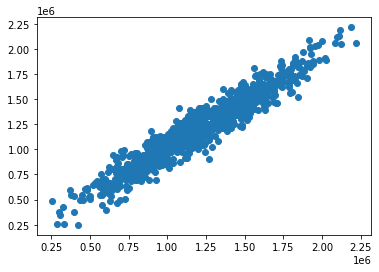

In [10]:
plt.scatter(ytest,ypredicted) # y test has only 1 vaRIBle so we can fix it in scatter plot

# Saving our trained model using pickle

In [12]:
import pickle
with open ('model_pickle','wb') as f:  #Pickle in Python is primarily used in serializing and deserializing a 
        pickle.dump(regres,f)          #python object structure. In other words, it's the process of converting a 
                                       #Python object into a byte stream to store it in a file/database, maintain 
                                       #program state across sessions, or transport data over the network.
                # using this saved binary file we can predict our future values
                # with open we are creating and writing a file named model_pickle

In [13]:
# reading the saved binary file of pickle to predict data
with open ('model_pickle','rb') as f: # rb means read binary
        model=pickle.load(f)

In [16]:
model.predict([[79545,5,7,8,23086,]])

/home/devfedora/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1116768.35692276])

In [ ]:
# we can also use joblib from the sklearn.internals from same task , but it is more efficienly work with objects which has large numpy arrays